In [ ]:
# Stuff that will appear at the top of notebooks;
# You don't have to understand how this works or change it for now.

from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

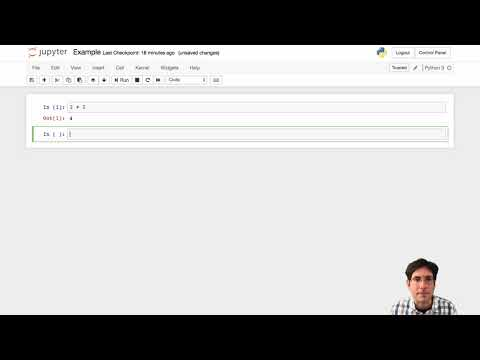

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('PFgBCG_evEg', width=800, height=300)

In [ ]:
2+3

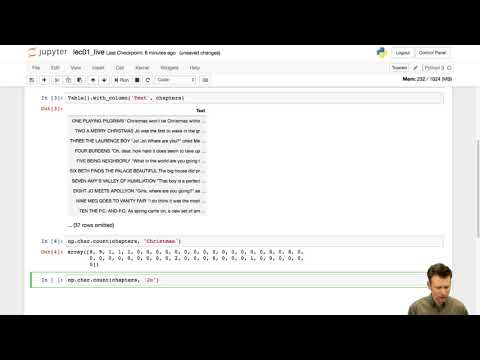

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('Yt-hzH_1u_A', width=800, height=300)

In [ ]:
# Read two books, fast!

huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

In [ ]:
huck_finn_chapters

In [ ]:
Table().with_column('Chapters', huck_finn_chapters)

In [ ]:
np.char.count(huck_finn_chapters, 'Tom')

In [ ]:
np.char.count(huck_finn_chapters, 'Jim')

In [ ]:
counts = Table().with_columns([
    'Tom', np.char.count(huck_finn_chapters, 'Tom'),
    'Jim', np.char.count(huck_finn_chapters, 'Jim'),
    'Huck', np.char.count(huck_finn_chapters, 'Huck'),
])
counts

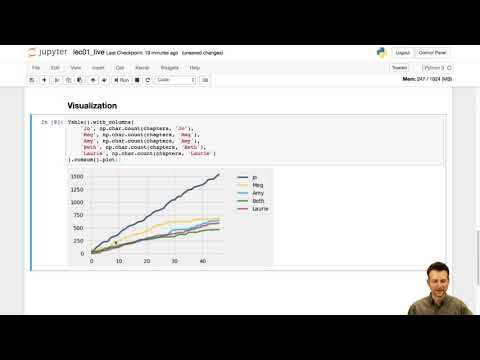

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo('N2Sq_2HMWFw', width=800, height=300)

In [ ]:
# Count how many times the names Jim, Tom, and Huck appear in each chapter

counts = Table().with_columns([
        'Jim', np.char.count(huck_finn_chapters, 'Jim'),
        'Tom', np.char.count(huck_finn_chapters, 'Tom'),
        'Huck', np.char.count(huck_finn_chapters, 'Huck')
    ])

# Plot the cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.

cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 44, 1))
cum_counts.plot(column_for_xticks=3)
plots.title('Cumulative Number of Times Name Appears');

In [ ]:
# The chapters of Little Women

Table().with_column('Chapters', little_women_chapters)

In [ ]:
# Counts of names in the chapters of Little Women

people = ['Amy', 'Beth', 'Jo', 'Laurie', 'Meg']
people_counts = {pp: np.char.count(little_women_chapters, pp) for pp in people}

counts = Table().with_columns([
        'Amy', people_counts['Amy'],
        'Beth', people_counts['Beth'],
        'Jo', people_counts['Jo'],
        'Laurie', people_counts['Laurie'],
        'Meg', people_counts['Meg']
    ])

In [ ]:
# Plot the cumulative counts

cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 48, 1))
cum_counts.plot(column_for_xticks=5)
plots.title('Cumulative Number of Times Name Appears');

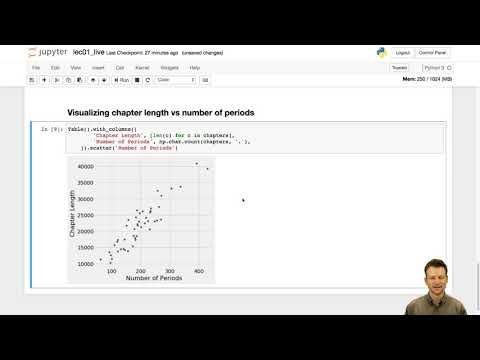

In [5]:
from IPython.display import YouTubeVideo

YouTubeVideo('GeZ3ugunMn4', width=800, height=300)

In [ ]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

chars_periods_hf = Table().with_columns([
        'HF Chapter Length', [len(s) for s in huck_finn_chapters],
        'Number of Periods', np.char.count(huck_finn_chapters, '.')
    ])
chars_periods_lw = Table().with_columns([
        'LW Chapter Length', [len(s) for s in little_women_chapters],
        'Number of Periods', np.char.count(little_women_chapters, '.')
    ])

In [ ]:
# The counts for Huckleberry Finn

chars_periods_hf

In [ ]:
# The counts for Little Women

chars_periods_lw

In [ ]:
plots.figure(figsize=(10,10))
plots.scatter(chars_periods_hf[1], chars_periods_hf[0], color='darkblue')
plots.scatter(chars_periods_lw[1], chars_periods_lw[0], color='gold')
plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');